# Environment
Currently local to Andromeda

# Generating waveforms

In [1]:
import numpy as np
import lalsimulation
import lal
import matplotlib.pyplot as plt

In [2]:
# Define binary parameters
m1 = 50.0*lal.MSUN_SI
m2 = 50.0*lal.MSUN_SI
phi_c = 0.
f_start22 = 8. #Frequency of the 22 mode at which the signal starts
distance = 500.0*lal.PC_SI
inclination = 0.
spin1_z = 0.5
spin2_z =  0.5
deltaT = 1./8192.

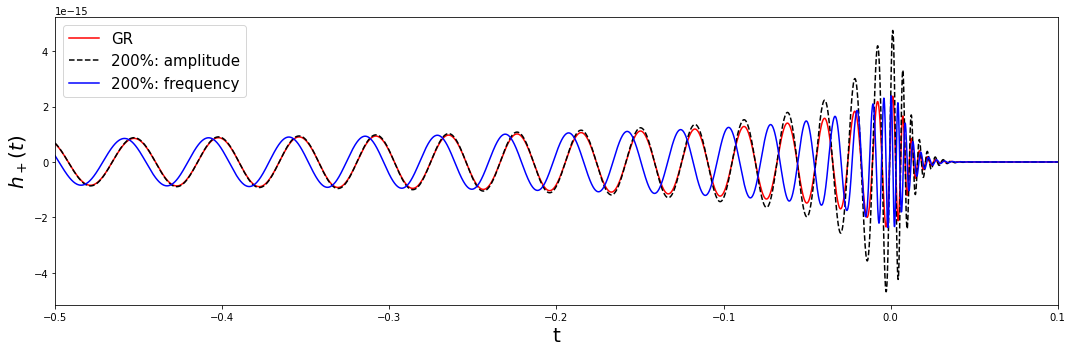

In [13]:
%matplotlib inline

plt.figure(figsize=(15,5))

paramdict = lal.CreateDict()

######## GR ###########
lalsimulation.SimInspiralWaveformParamsInsertDNRA(paramdict, 0.0)
lalsimulation.SimInspiralWaveformParamsInsertDNROmega(paramdict, 0.0)

# Generate the waveform
hp1, hc1 =  lalsimulation.SimInspiralChooseTDWaveform(m1, m2,  0., 0., spin1_z, 0., 0., spin2_z, distance, 0., 
                                                    phi_c, 0., 0., 0., deltaT, f_start22, f_start22, paramdict, lalsimulation.SEOBNRv4HM)
h1 = hp1.data.data - 1j*hc1.data.data
time_array1 = np.arange(0,len(h1)*deltaT,deltaT)

idx_max, = np.where(abs(h1) == max(abs(h1)))
time_array1 = time_array1 - time_array1[idx_max]

######## dnra=1 ###########
paramdict = lal.CreateDict()

#add a deviation nra=1.0
lalsimulation.SimInspiralWaveformParamsInsertDNRA(paramdict, 1.0)

# Generate the waveform
hp2, hc2 =  lalsimulation.SimInspiralChooseTDWaveform(m1, m2,  0., 0., spin1_z, 0., 0., spin2_z, distance, 0., 
                                                    phi_c, 0., 0., 0., deltaT, f_start22, f_start22, paramdict, lalsimulation.SEOBNRv4HM)
h2 = hp2.data.data - 1j*hc2.data.data
time_array2 = np.arange(0,len(h2)*deltaT,deltaT)

idx_max, = np.where(abs(h2) == max(abs(h2)))
time_array2 = time_array2 - time_array2[idx_max]

######## dnromega=1 ###########
paramdict = lal.CreateDict()

#add a deviation nra=1.0
lalsimulation.SimInspiralWaveformParamsInsertDNROmega(paramdict, 1.0)

# Generate the waveform
hp3, hc3 =  lalsimulation.SimInspiralChooseTDWaveform(m1, m2,  0., 0., spin1_z, 0., 0., spin2_z, distance, 0., 
                                                    phi_c, 0., 0., 0., deltaT, f_start22, f_start22, paramdict, lalsimulation.SEOBNRv4HM)
h3 = hp3.data.data - 1j*hc3.data.data
time_array3 = np.arange(0,len(h3)*deltaT,deltaT)

idx_max, = np.where(abs(h3) == max(abs(h3)))
time_array3 = time_array3 - time_array3[idx_max]

# plotting
plt.plot(time_array1, hp1.data.data, color='r', label="GR")
plt.plot(time_array2, hp2.data.data, color='k', ls='dashed', label="200%: amplitude")
plt.plot(time_array3, hp3.data.data, color='b', label="200%: frequency")
plt.xlabel('t', fontsize=20)
plt.ylabel('$h_+(t)$', fontsize=20)
plt.xlim([-0.5,0.1])

plt.legend(loc="best", fontsize=15)

plt.tight_layout()
plt.show()

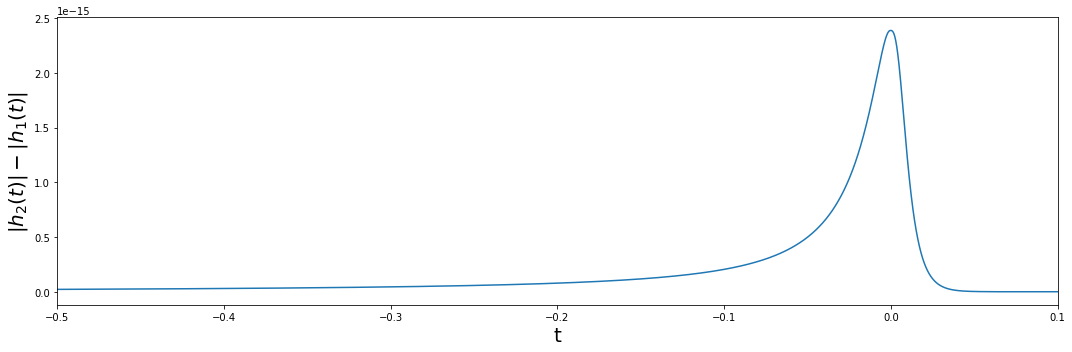

In [4]:
plt.figure(figsize=(15,5))
plt.plot(time_array1, abs(h2)-abs(h1))
plt.xlim([-0.5,0.1])
plt.xlabel('t', fontsize=20)
plt.ylabel('$|h_2(t)| - |h_1(t)|$', fontsize=20)

plt.tight_layout()
plt.show()